<a href="https://colab.research.google.com/github/ola-sumbo/Hamoye-and-ML-with-Ude/blob/master/Geospatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time 
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
!pip install geoplot
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install geopandas
!wget https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip
!mkdir maps
!cd maps
!unzip ../cb_2018_us_state_20m.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 21 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

--2020-10-26 18:56:06--  https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip
Resolving www2.census.gov (www2.census.gov)... 172.224.200.156, 2600:1402:16:59c::208c, 2600:1402:16:58c::208c
Connecting to www2.census.gov (www2.census.gov)|172.224.200.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cb_2018_us_state_20m.zip’

cb_2018_us_state_20     [ <=>                ] 186.74K  --.-KB/s    in 0.04s   

2020-10-26 18:56:06 (4.86 MB/s) - ‘cb_2018_us_state_20m.zip’ saved [191218]

unzip:  cannot find or open ../cb_2018_us_state_20m.zip, ../cb_2018_us_state_20m.zip.zip or ../cb_2018_us_state_20m.zip.ZIP.
CPU times: user 521 ms, sys: 204 ms, total: 725 ms
Wall time: 1min 28s


**Links to reference**[link text](https://mc.ai/import-data-into-google-colaboratory/#:~:text=1.,use%20this%20shell%20command%3A%20wget.)

In [1]:
!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-pinc5ro8
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-pinc5ro8
  Created wheel for geopandas: filename=geopandas-0.8.0+55.g924cdf6-py2.py3-none-any.whl size=970002 sha256=0339be9e0a5175416358af9449ac70f42ece853fcc21b869a115a5deee3d0317
  Stored in directory: /tmp/pip-ephem-wheel-cache-9nnpl6dj/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
  Cloning git://github.com/ResidentMario/geoplot.git to /tmp/pip-req-build-1bxxpn1p
  Running command git clone -q git://github.com/ResidentMario/geoplot.git /tmp/pip-r

**Useful link for all types of uploads**[link text](https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory)
[link text](https://nextjournal.com/mpd/install-python-packages//)

In [3]:
!wget http://www2.census.gov/programs-surveys/popest/datasets/2010-2018/national/totals/nst-est2018-alldata.csv
!mv nst-est2018-alldata.csv data

URL transformed to HTTPS due to an HSTS policy
--2020-10-26 19:03:53--  https://www2.census.gov/programs-surveys/popest/datasets/2010-2018/national/totals/nst-est2018-alldata.csv
Resolving www2.census.gov (www2.census.gov)... 172.224.200.156, 2600:1402:16:58c::208c, 2600:1402:16:59c::208c
Connecting to www2.census.gov (www2.census.gov)|172.224.200.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘nst-est2018-alldata.csv’

nst-est2018-alldata     [ <=>                ]  64.94K  --.-KB/s    in 0.01s   

2020-10-26 19:03:53 (5.80 MB/s) - ‘nst-est2018-alldata.csv’ saved [66497]



In [4]:
!wget https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip
!mkdir maps
!cd maps
!unzip /content/cb_2018_us_state_20m.zip

--2020-10-26 19:04:28--  https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip
Resolving www2.census.gov (www2.census.gov)... 172.224.200.156, 2600:1402:16:58c::208c, 2600:1402:16:59c::208c
Connecting to www2.census.gov (www2.census.gov)|172.224.200.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cb_2018_us_state_20m.zip.1’

cb_2018_us_state_20     [ <=>                ] 186.74K  --.-KB/s    in 0.04s   

2020-10-26 19:04:28 (4.14 MB/s) - ‘cb_2018_us_state_20m.zip.1’ saved [191218]

mkdir: cannot create directory ‘maps’: File exists
Archive:  /content/cb_2018_us_state_20m.zip
  inflating: cb_2018_us_state_20m.shp.ea.iso.xml  
  inflating: cb_2018_us_state_20m.shp.iso.xml  
  inflating: cb_2018_us_state_20m.shp  
  inflating: cb_2018_us_state_20m.shx  
  inflating: cb_2018_us_state_20m.dbf  
  inflating: cb_2018_us_state_20m.prj  
 extracting: cb_2018_us_state_20m.cpg  


In [2]:
usa = gpd.read_file("/content/cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [3]:
state_pop = pd.read_csv("/content/data")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,...,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RDEATH2017,RDEATH2018,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,316057727,318386421,320742673,323071342,325147121,327167434,567980,2253924,2294209,2183509,2328694,2356252,2328669,2075779,2020313,987836,3973485,3936976,3940576,3963195,3992376,3962654,3901982,3855500,598691,2512442,2501531,2608019,2582448,2699826,...,8.092824,7.999086,8.280320,8.140821,8.448453,8.397503,8.575615,8.627779,4.706164,4.590088,4.230797,4.352620,4.044723,3.912431,3.463480,3.193205,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,55907823,56015864,56047587,56058789,56072676,56111079,62215,219887,176197,131094,108041,31723,11202,13887,38403,163454,646265,637904,635741,632433,634515,628039,616552,609336,110848,470816,460985,480032,470196,488881,...,8.484610,8.277902,8.596211,8.402082,8.725075,8.569200,8.936332,9.037120,3.161779,3.176932,2.788371,2.899065,2.599135,2.635140,2.060617,1.826058,3.724704,3.727583,3.475915,3.979229,4.056184,4.223096,3.850338,4.095067,-2.879569,-3.686821,-3.872926,-4.903180,-6.067920,-6.653556,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,67564135,67752238,67869139,67996917,68156035,68308744,45006,177882,184306,227198,188103,116901,127778,159118,152709,212614,834909,830701,830869,836505,837968,831667,816177,804431,140785,586840,584817,605188,597078,626494,...,8.750488,8.696838,8.972323,8.824919,9.238868,9.118849,9.115572,9.101689,3.699006,3.656551,3.345874,3.538774,3.118594,3.123606,2.873548,2.687888,1.743835,1.799322,1.878132,1.985126,2.105258,2.132380,1.851051,1.869830,-2.786843,-2.695897,-1.835627,-2.700782,-3.462920,-3.359191,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833
3,20,3,0,0,South Region,114555744,114563045,114867066,116039399,117271075,118393244,119657737,121037542,122401186,123598424,124753948,304021,1172333,1231676,1122169,1264493,1379805,1363644,1197238,1155524,368752,1509597,1504936,1504799,1525280,1545722,1541342,1519944,1499838,228706,962751,960575,1011093,1006057,1052360,...,8.338883,8.234307,8.580790,8.452450,8.744334,8.693547,8.885778,8.932083,4.736515,4.666409,4.189909,4.362284,4.099474,3.969533,3.471510,3.146223,2.471503,2.950558,2.799720,3.068931,3.565404,3.588542,3.289290,3.369551,2.908165,2.885554,2.490347,3.137471,3.763090,3.636504,2.963135,2.779373,5.379667,5.836112,5.290067,6.206402,7.328494,7.225046,6.252425,6.148925
4,20,4,0,0,West Region,71945553,71946887,72103625,72787447,73489477,74192525,74960582,75788405,76614450,77319986,77993663,156738,683822,702030,703048,768057,827823,826

**Merge data**[link text](https://towardsdatascience.com/plotting-geographical-data-with-geopandas-338cc7e17e4e)

In [4]:
pop_states = usa.merge(state_pop, left_on="NAME", right_on="NAME")
pop_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,SUMLEV,REGION,DIVISION,STATE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,...,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RDEATH2017,RDEATH2018,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",40,3,5,24,5773552,5773798,5788642,5838991,5887072,5923704,5958165,5986717,6004692,6024891,6042718,14844,50349,48081,36632,34461,28552,17975,20199,17827,18454,73542,72720,72362,72756,74158,...,7.512105,7.412718,7.744792,7.529960,7.896269,7.878807,8.405113,8.482873,5.137417,4.990422,4.508764,4.716598,4.520430,4.361122,3.588321,3.288970,3.564956,4.393632,3.624825,3.938269,4.615533,3.597409,3.783340,3.741421,0.035777,-1.078452,-1.848989,-2.778014,-4.299749,-4.949543,-3.991992,-4.063440,3.600733,3.315179,1.775836,1.160255,0.315784,-1.352135,-0.208652,-0.322019
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",40,2,4,19,3046355,3046872,3050767,3066054,3076097,3093078,3109504,3121460,3131785,3143637,3156145,3895,15287,10043,16981,16426,11956,10325,11852,12508,9966,37852,38478,38805,39460,39694,...,9.223745,9.132957,9.446644,9.326761,9.567701,9.335633,9.184084,9.144126,3.152618,3.396204,3.133644,3.396972,3.173185,3.274780,3.210939,3.052169,2.020657,1.324617,2.260594,2.212627,1.762809,1.798106,1.851350,1.850223,-0.176889,-1.445096,0.099203,-0.287300,-1.060510,-1.761645,-1.278002,-0.916222,1.843768,-0.120479,2.359797,1.925327,0.702299,0.036461,0.573348,0.934001
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",40,3,5,10,897934,897934,899595,907316,915188,923638,932596,941413,949216,957078,967171,1661,7721,7872,8450,8958,8817,7803,7862,10093,2848,11301,11155,10889,10982,11026,...,8.713213,8.442231,8.801268,8.702567,9.106680,8.994890,9.640696,9.673384,3.795428,3.799169,3.042158,3.129993,2.660606,2.732424,1.761533,1.457192,1.722276,1.365155,2.596222,1.918939,2.434353,1.944326,1.770976,1.891647,3.079288,3.545671,3.613175,4.574854,4.321217,3.572356,4.689728,7.127976,4.801565,4.910826,6.209397,6.493793,6.755571,5.516683,6.460703,9.019623
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",40,2,3,39,11536504,11536757,11539327,11543463,11548369,11576576,11602973,11617850,11635003,11664129,11689442,2570,4136,4906,28207,26397,14877,17153,29126,25313,34809,137927,137682,139089,139560,139546,...,9.589482,9.649473,9.904110,9.654804,10.187408,10.109125,10.133511,10.050626,2.361153,2.275263,2.125237,2.386845,1.831632,1.818358,1.558427,1.487995,1.271943,1.517766,2.085713,1.798309,2.115946,2.097807,1.667101,1.756819,-3.271268,-3.338756,-1.720653,-1.828854,-2.609985,-2.411231,-0.698138,-1.040184,-1.999325,-1.820990,0.365060,-0.030544,-0.494039,-0.313424,0.968963,0.716636
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",40,1,2,42,12702379,12702873,12711158,12744583,12766827,12776621,12789101,12785759,127

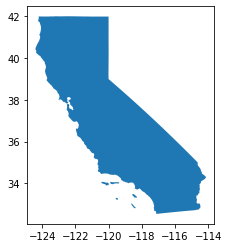

In [5]:
pop_states[pop_states.NAME=="California"].plot()

**Alternatively we can plot this**

In [6]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

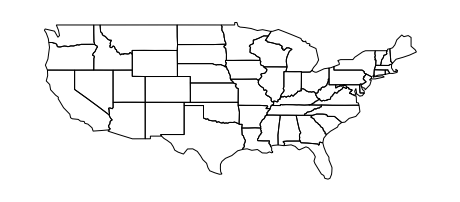

In [7]:
# then plot 
gplt.polyplot(contiguous_usa)

**Plot the area of the city with contagion by overplotting on the previous graph**

In [8]:
# define a new data set to create regions with contagions
path = gplt.datasets.get_path("usa_cities")
usa_cities = gpd.read_file(path)

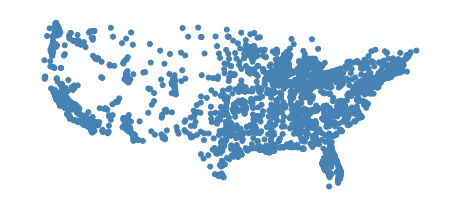

In [9]:
# points on map with contagion
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK","PR"]')
gplt.pointplot(continental_usa_cities)

In [ ]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

Geometry must be a Point or LineString


In [ ]:
#compare the two map by overplotting each map on the other
# Representing Data
ax = gplt.polyplot(contiguous_usa, projection=gcrs.Mercator())
gplt.pointplot(continental_usa_cities, ax=ax, hue="ELEV_IN_FT", legend=True)

In [ ]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

In [ ]:
ax = gplt.polyplot(
  contiguous_usa,
  edgecolor="white",
  facecolor="lightgray",
  figsize=(12, 8),
  projection=gcrs.AlbersEqualArea()
)

gplt.pointplot(
  continental_usa_cities,
  ax=ax,
  hue="ELEV_IN_FT",
  cmap="Blues",
  scheme="quantiles",
  scale="ELEV_IN_FT",
  limits=(1, 10),
  legend=True,
  legend_var="scale",
  legend_kwargs={"frameon": False},
  legend_values=[-110, 1750, 3600, 5500, 7400],
  legend_labels=["-110 feet", "1750 feet", "3600 feet", "5500 feet", "7400 feet"]
)

ax.set_title("Cities in the continental US, by elevation", fontsize=16)

Geometry must be a Point or LineString


**Links to map using cartopy[link text](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)**

In [ ]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  contiguous_usa,
  hue="population",
  edgecolor="white",
  linewidth=1,
  cmap="Greens",
  legend=True,
  scheme="FisherJenks",
  legend_labels=[
    "<3 million", "3-6.7 million", "6.7-12.8 million",
    "12.8-25 million", "25-37 million"
  ],
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

**session crash implement another[link text](https://towardsdatascience.com/visualizing-geospatial-data-in-python-e070374fe621/)**